# Limitaciones del computador

Números en computador (aritmética de punto flotante):

$$ 1.234 = (-1)^n\cdot 1234 \cdot 10^{-3} $$

- Signo  (n, 0 o 1)
- Mantisa (1234)
- Base (10)
- Exponente (-3)

In [6]:
a = 2.0
print(type(a))
print("{:.3f}".format(1/3))
print("{:.7f}".format(1/3))
print("{:.12f}".format(1/3))
print("{:.16f}".format(1/3))
print("{:.20f}".format(1/3))
print("{:.100f}".format(1/3))

<class 'float'>
0.333
0.3333333
0.333333333333
0.3333333333333333
0.33333333333333331483
0.3333333333333333148296162562473909929394721984863281250000000000000000000000000000000000000000000000


# Aproximación matemática

Fórmula de Taylor para aproximar funciones

$$ f(x) = f(x_0) + f'(x_0)(x - x_0) + \frac{ f'(x_0) }{2!}(x-x_0)^2 + \cdot\cdot\cdot + \frac{f^(k)(x_0)}{k!}(x-x_0)^k + O((x-x_0)^{k+1}) $$

donde el error es de la forma

$$ e_{k+1} =  \frac{f^{(k+1)}(\xi)}{(k+1)!}(x-x_0)^{k+1} $$

$$ f(x) = f(x_0) + f'(x_0)(x - x_0) + \frac{ f'(x_0) }{2!}(x-x_0)^2 + \cdot\cdot\cdot + \frac{f^(k)(x_0)}{k!}(x-x_0)^k + O((x-x_0)^{k+1}) $$

- Aproximar función ($h=x-x_0$):

$$ f(x) = f(x_0) + f'(x_0)(x-x_0) + O(h^2) $$

- Aproximar derivada:

$$ \frac{f(x) - f(x_0)}{x - x_0} = f'(x_0) + O(h) $$

In [7]:
import numpy as np
from math import factorial
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [3,3]

def f(x):
    return np.sin(x)

def df(x):
    return np.cos(x)

def dfk(x,k):
    res = k%4
    if res == 0:
        return f(x)
    elif res == 1:
        return df(x)
    elif res == 2:
        return -np.sin(x)
    else:
        return -np.cos(x) 

def f_Taylor(x, x0, k):
    out = f(x0)
    h = x-x0
    for j in range(k):
        out += dfk(x0, j+1) / factorial(j+1) * h**(j+1)
    return out

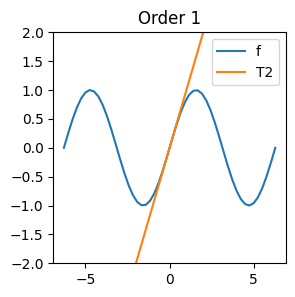

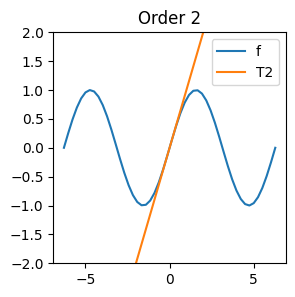

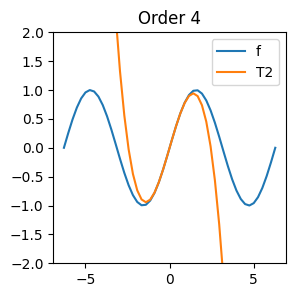

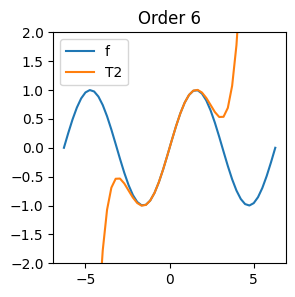

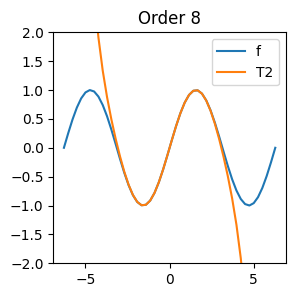

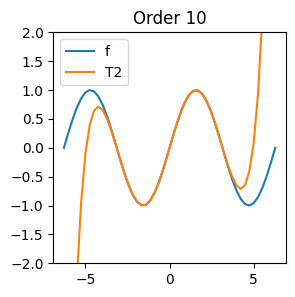

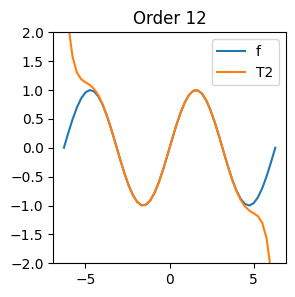

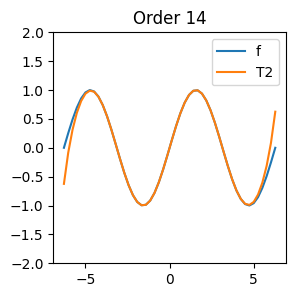

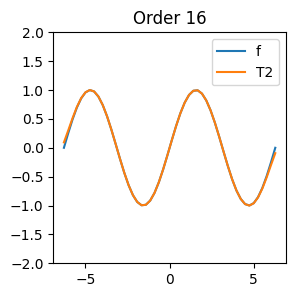

In [9]:
xs = np.linspace(-2*np.pi,2*np.pi)
fs = f(xs)  # [ f(x) for x in xs ]


for k in (1,2,4,6,8,10,12,14,16):
    plt.plot(xs,fs,label="f")
    fs_taylor = f_Taylor(xs, 0.0, k)
    plt.plot(xs,fs_taylor,label="T2")
    plt.ylim(-2,2)
    plt.legend(); plt.title("Order {}".format(k)); plt.show()

# Orden de convergencia

Recordemos que 

- Aproximar función ($h=x-x_0$):

$$ f(x) = f(x_0) + f'(x_0)(x-x_0) + O(h^2) $$

- Aproximar derivada:

$$ \frac{f(x) - f(x_0)}{x - x_0} = f'(x_0) + O(h) $$

In [10]:
def f_approx(x, h):
    return f(x) + df(x) * h

errors_f=[]
errors_df = []
hs = [10**k for k in range(1, -8, -1)]
x = 0.1
for h in hs:
    error_f = abs(f(x+h) - f_approx(x, h)) # Aproximación de función
    errors_f.append(error_f)
    error_df = abs( (f(x+h) - f(x))/h - df(x) ) # Aproximación de derivada
    errors_df.append(error_df)

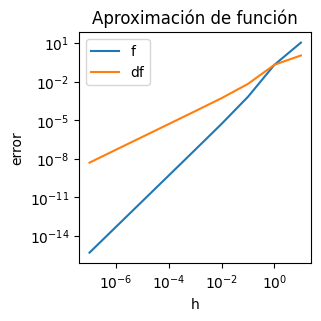

In [11]:
plt.loglog(hs, errors_f, label = "f")
plt.loglog(hs, errors_df, label="df")
plt.legend()
plt.title("Aproximación de función")
plt.xlabel("h")
plt.ylabel("error")
plt.show()

# Diferencias finitas

Para derivadas de segundo orden: 

$$ f''(x) \approx 1/h\left(f'(x+h) - f'(x)\right) \approx 1/h \left( \frac{1}{h}\left(f(x+h)-f(x)\right) - \frac{1}{h}\left(f(x) - f(x-h)\right)\right) $$

Luego
 
 - Primera derivada:

$$ f'(x) \approx \frac 1 h \left( f(x+h) - f(x) \right) $$
$$ f'(x) \approx \frac 1 h \left( f(x) - f(x-h) \right) $$

 - Segunda derivada:

$$ f''(x) \approx  \frac{1}{h^2} \left( f(x+h)-2f(x)+ f(x-h)\right) $$

### Análisis del error (pizarra)

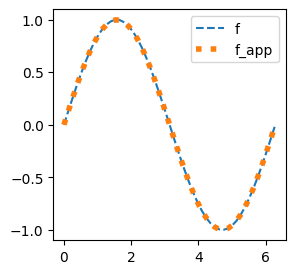

In [29]:
def f(x): 
    return np.sin(x)
def df2_approx(x,h):
    return 1/h**2 * (f(x+h) - 2 * f(x) + f(x-h) )

h = 0.1
xs = np.linspace(0,2*np.pi)
fs = f(xs)
fs_app = df2_approx(xs, h)
plt.plot(xs, fs, linestyle='dashed', label="f")
plt.plot(xs,-fs_app, linestyle='dotted', linewidth=4, label="f_app")
plt.legend()
plt.show()

# Discretización y representación matricial

# Ecuación de segundo orden

Encontrar $u:(0,1)\to \mathbb{R}$ tal que

$$ \begin{aligned}
    a u''(x) + b u'(x) + c u(x) &= f(x) \\
    u(0) &= u_0 \\
    u(1) &= u_1
\end{aligned}$$